In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import brainstat
import brainstat.datasets as datasets

from scipy.stats import sem
from brainstat.datasets import fetch_yeo_networks_metadata
from brainstat.datasets import fetch_parcellation
from brainspace.utils.parcellation import map_to_labels
from brainstat.context.resting import yeo_networks_associations
from surfplot import Plot

lh, rh = brainstat.datasets.fetch_template_surface('fsaverage5', join=False)


DIRECTORY_PATH = "/Users/wciezobka/sano/projects/masters-thesis/Results/lime/20240410-164742_LTP/explanations"
THRESHOLD = 0.002

In [2]:
xs_stroke = np.array([np.load(f) for f in glob.glob(DIRECTORY_PATH+"/*PAT*")])
xs_control = np.array([np.load(f) for f in glob.glob(DIRECTORY_PATH+"/*CON*")])

schaefer = datasets.fetch_parcellation('fsaverage5','schaefer',100)
yeo_networks = fetch_parcellation("fsaverage5", "yeo", 7)
network_names, yeo_colormap = fetch_yeo_networks_metadata(7)

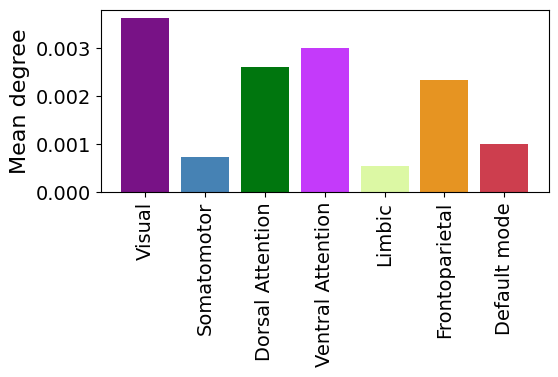

In [3]:
assignment = xs_stroke.sum(axis=0) >= THRESHOLD
assignment_mean = assignment.mean(axis=0)
assignment_sum = assignment.sum(axis=0)
xx = map_to_labels(assignment_mean, schaefer, mask=schaefer!=0).astype(float)
yeo_tstat_mean = yeo_networks_associations(xx, "fsaverage5")

plt.bar(
    np.arange(7),
    yeo_tstat_mean[:, 0],
    color=yeo_colormap,
    error_kw={"elinewidth": 5},
)
plt.xticks(np.arange(7), network_names, rotation=90, fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel("Mean degree", fontdict={"fontsize": 16})
plt.gcf().subplots_adjust(left=0.2, bottom=0.5)
plt.show()

In [4]:
# stroke positive
aa=xs_stroke.sum(axis=0)
assignment = xs_stroke.sum(axis=0)>=th
assignment = assignment.sum(axis=0)
xx = assignment_surface = map_to_labels(assignment, schaefer, mask=schaefer!=0)
xx = xx.astype(float)
xx[xx==0]=np.nan
p = Plot(lh, rh)
p.add_layer(xx)
fig = p.build()
fig.show()

NameError: name 'th' is not defined